In [406]:
import pandas as pd

import regex as re

from matplotlib import pyplot as plt

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [234]:
raw = pd.read_csv('artists.csv')
raw.columns

/var/folders/rm/njky_wt54g94lt5wrw23wsg00000gn/T/ipykernel_90550/188685385.py:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('artists.csv')


Index(['mbid', 'artist_mb', 'artist_lastfm', 'country_mb', 'country_lastfm',
       'tags_mb', 'tags_lastfm', 'listeners_lastfm', 'scrobbles_lastfm',
       'ambiguous_artist'],
      dtype='object')

In [275]:
data = pd.DataFrame({'artist': raw['artist_mb'], 'tags': raw['tags_mb'], 'listeners': raw['listeners_lastfm']})
data

,artist,tags,listeners
0,Coldplay,rock; pop; alternative rock; british; uk; brit...,5381567.0
1,Radiohead,rock; electronic; alternative rock; british; g...,4732528.0
2,Red Hot Chili Peppers,rock; alternative rock; 80s; 90s; rap; metal; ...,4620835.0
3,Rihanna,pop; dance; hip hop; reggae; contemporary r b;...,4558193.0
4,Eminem,turkish; rap; american; hip-hop; hip hop; hiph...,4517997.0
...,...,...,...
1466078,정은지,NaN,NaN
1466079,남태현,NaN,NaN
1466080,헤일로,NaN,NaN
1466081,서현진,NaN,NaN


In [344]:
data[data['artist'].map(lambda artistName: artistName.isascii() if type(artistName) == str else False)]
data['artist'] = data['artist'].apply(lambda artistName: artistName.lower())
data

,artist,tags,listeners,cluster
0,coldplay,rock pop alternative rock british uk britanniq...,5381567.0,2.0
1,radiohead,rock electronic alternative rock british grung...,4732528.0,0.0
2,red hot chili peppers,rock alternative rock 80s 90s rap metal americ...,4620835.0,9.0
3,rihanna,pop dance hip hop reggae contemporary r b elec...,4558193.0,0.0
4,eminem,turkish rap american hiphop hip hop hiphop mid...,4517997.0,0.0
...,...,...,...,...
24130,new cool collective,jazz,42028.0,0.0
24140,demet akalın,turkish,42007.0,4.0
24141,kimberley locke,american idol,42005.0,4.0
24142,fred hersch,jazz,42003.0,0.0


In [295]:
data.dropna(inplace=True)
data

,artist,tags,listeners
0,Coldplay,rock; pop; alternative rock; british; uk; brit...,5381567.0
1,Radiohead,rock; electronic; alternative rock; british; g...,4732528.0
2,Red Hot Chili Peppers,rock; alternative rock; 80s; 90s; rap; metal; ...,4620835.0
3,Rihanna,pop; dance; hip hop; reggae; contemporary r b;...,4558193.0
4,Eminem,turkish; rap; american; hip-hop; hip hop; hiph...,4517997.0
...,...,...,...
986701,高為傑,chinese; composer,0.0
986729,그레인저,fix me please korean,0.0
986739,레나르,fix me please korean,0.0
986741,바트,fix me please korean,0.0


In [345]:
data.drop(data[data['listeners'] < 10000.0].index, inplace=True)
tags_new = data['tags'].apply(lambda tagsStr: re.sub(r'[^\w\s]', '', tagsStr))
data['tags'] = tags_new
data

,artist,tags,listeners,cluster
0,coldplay,rock pop alternative rock british uk britanniq...,5381567.0,2.0
1,radiohead,rock electronic alternative rock british grung...,4732528.0,0.0
2,red hot chili peppers,rock alternative rock 80s 90s rap metal americ...,4620835.0,9.0
3,rihanna,pop dance hip hop reggae contemporary r b elec...,4558193.0,0.0
4,eminem,turkish rap american hiphop hip hop hiphop mid...,4517997.0,0.0
...,...,...,...,...
24130,new cool collective,jazz,42028.0,0.0
24140,demet akalın,turkish,42007.0,4.0
24141,kimberley locke,american idol,42005.0,4.0
24142,fred hersch,jazz,42003.0,0.0


<AxesSubplot:>

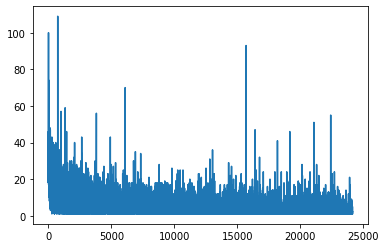

In [405]:
tags_count = data['tags'].apply(lambda tagsStr: tagsStr.count(' ') + 1.0)
tags_count.plot()

In [353]:
tags_count.mean()

6.231584777276684

In [363]:
# tags_count.loc[tags_count < 3].count()
tags_count.count()

12639

In [364]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['tags'])

In [370]:
distortions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

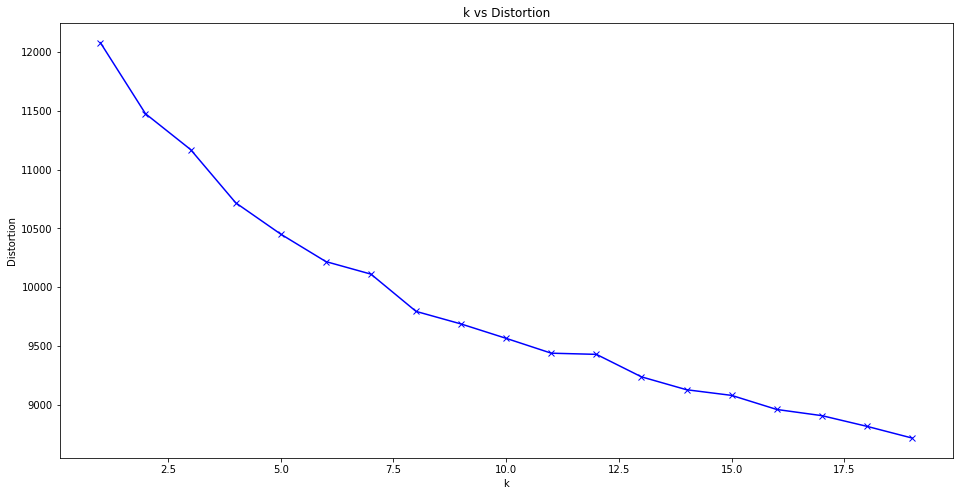

In [379]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 20), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k vs Distortion')
plt.show()

In [320]:
optimal_k = 10
model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
data['cluster'] = pd.DataFrame(model.labels_)
data.dropna(inplace=True)

In [321]:
data.groupby('cluster').count()

,artist,tags,listeners
cluster,,,
0.0,6069,6069,6069
1.0,467,467,467
2.0,1192,1192,1192
3.0,642,642,642
4.0,822,822,822
5.0,693,693,693
6.0,653,653,653
7.0,364,364,364
8.0,604,604,604


In [386]:
def recommendArtist(artistName):
    artist = data.loc[data['artist'] == artistName]
    c = artist.cluster.values[0]
    cluster  = data.loc[data['cluster'] == c]
    return cluster.sample(n=5)

In [387]:
recommendArtist('aphex twin')

,artist,tags,listeners,cluster
20232,rainald grebe,german cabaret pianist kabarett,51563.0,9.0
10835,sid vicious,classic pop and rock,100553.0,9.0
23348,f.i.r.,chinese mandarin,43615.0,9.0
14791,chicken lips,dance and electronica,73061.0,9.0
3343,dj vadim,hip hop dj hip hop rnb and dance hall instrume...,304000.0,9.0


In [388]:
recommendArtist('kanye west')

,artist,tags,listeners,cluster
3006,amiina,icelandic rock and indie,337400.0,5.0
18409,manu katché,jazz,57335.0,5.0
11173,drexciya,american electro usa techno detroit techno warp,97515.0,5.0
16923,phil lesh & friends,proper group,63062.0,5.0
7753,promoe,hip hop,139988.0,5.0


In [403]:
recommendArtist('charles mingus')

,artist,tags,listeners,cluster
16893,adam tensta,electronic rap hiphop hip hop,63136.0,9.0
21244,ce’cile,dancehall,48705.0,9.0
24124,the redwalls,classic rock,42042.0,9.0
1576,j dilla,american hiphop experimental hip hop soul deat...,567196.0,9.0
60,the who,rock british uk hard rock britannique art rock...,2766960.0,9.0


In [399]:
recommendArtist('burial')

,artist,tags,listeners,cluster
1457,kim wilde,rock synthpop pop british new wave uk dancepop...,595232.0,3.0
19440,taylor davis,classical pop crossover anime film score,54124.0,3.0
13901,d-block,hip hop,78639.0,3.0
11603,storm,pagan metal,93644.0,3.0
17012,ottorino respighi,soundtrack classical italian conductor score c...,62741.0,3.0


In [404]:
recommendArtist('madlib')

,artist,tags,listeners,cluster
23940,linda scott,american vocalist usa,42404.0,0.0
21804,cecil otter,hip hop,47280.0,0.0
9005,dillinger,classic pop and rock,121752.0,0.0
14370,walter beasley,jazz rhythm and blues smooth jazz,75513.0,0.0
6768,s-tone inc.,acid jazz,157994.0,0.0
